In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [32]:
# Cargar los datos
data = pd.read_csv('archivo_filtrado.csv')

# Seleccionar las columnas relevantes para el clustering
columns = ['EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'OCUHOM', 'OCUMUJ', 'CLAUNI']

# Filtrar los datos y eliminar las filas con valores faltantes
filtered_data = data[columns].dropna()


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

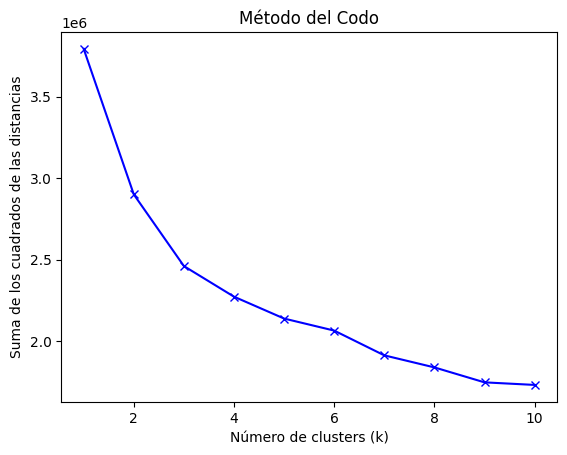

In [33]:
# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
inertia = []
k_values = range(1, 11)  # Rango de valores de k a probar

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar la curva de la suma de los cuadrados de las distancias
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del Codo')
plt.show()

In [35]:
# Calcular el promedio de las edades
filtered_data['EDAD_PROMEDIO'] = (filtered_data['EDADHOM'] + filtered_data['EDADMUJ']) / 2

# Eliminar las columnas 'EDADHOM' y 'EDADMUJ'
filtered_data = filtered_data.drop(['EDADHOM', 'EDADMUJ'], axis=1)

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)


C:\Users\Jose\AppData\Local\Temp\ipykernel_11376\262085313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['EDAD_PROMEDIO'] = (filtered_data['EDADHOM'] + filtered_data['EDADMUJ']) / 2


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


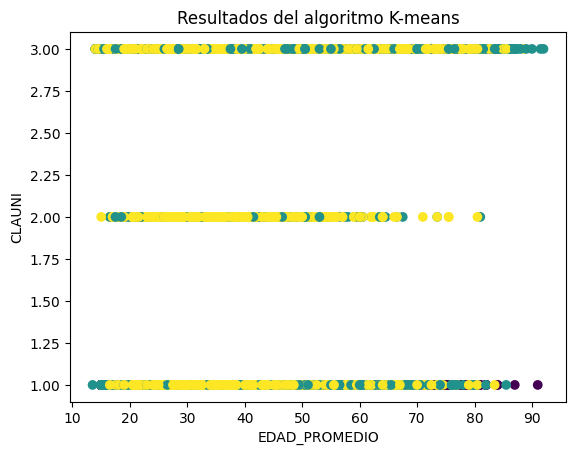

In [38]:
# Aplicar el algoritmo k-means
k = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Obtener las etiquetas de los clusters y asignarlas a los datos filtrados
cluster_labels = kmeans.labels_
filtered_data['Cluster'] = cluster_labels

# Graficar los resultados
plt.scatter(filtered_data['EDAD_PROMEDIO'], filtered_data['CLAUNI'], c=filtered_data['Cluster'])
plt.xlabel('EDAD_PROMEDIO')
plt.ylabel('CLAUNI')
plt.title('Resultados del algoritmo K-means')
plt.show()